In [75]:
import pandas as pd
from rdkit.Chem import PandasTools, Crippen
import rdkit 
from rdkit import Chem

from collections import Counter
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
sdffile = "Data/chembl_logd_exp_w_features.sdf"

In [49]:
df = PandasTools.LoadSDF(sdffile,smilesName='SMILES',molColName='Molecule', includeFingerprints=True)

In [50]:
df['mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

In [51]:
df['crippen_logp'] = df['mol'].apply(lambda x: Crippen.MolLogP(x))

In [52]:
crippen_df = pd.read_csv("Crippen.txt", sep="\t", skiprows=7, skip_blank_lines=True)

In [53]:
crippen_columns = list(set(crippen_df["#ID"].to_list()))

In [54]:
df = df.reindex(columns = df.columns.tolist() + crippen_columns)

In [46]:
features

['C1,C1,C3,C3,C5,C8,C9,C10,C11,C12,C15,C18,C20,C21,C22,C23,C26,CS,H1,H3,HS,N2,N6,N8,N11,NS,O1,O4,O8,O9,O10,OS,Cl',
 'C1,C3,C3,C4,C5,C10,C11,C12,C14,C15,C18,C19,C20,C21,C22,C23,C25,C26,CS,H1,H3,HS,N1,N4,N7,N11,NS,O1,O4,O8,O9,O10,OS,F,Cl',
 'C1,C2,C3,C4,C5,C11,C12,C15,C18,C21,C23,C26,CS,H1,H2,H4,HS,N7,N11,NS,O1,O2,O4,O8,O9,O10,OS,Cl',
 'C1,C5,C8,C11,C12,C18,C21,C23,C26,CS,H1,H3,HS,N2,N11,NS,O1,O4,O8,O9,O10,OS',
 'C1,C2,C3,C4,C5,C11,C12,C15,C18,C21,C23,C26,CS,H1,H2,H4,HS,N7,N11,NS,O1,O2,O4,O8,O9,O10,OS,Cl',
 'C1,C7,C8,C9,C10,C11,C12,C14,C18,C21,C22,C23,C26,CS,H1,H3,HS,N4,N9,N11,NS,O1,O4,OS,F',
 'C1,C1,C3,C4,C8,C10,C11,C12,C18,C19,C20,C21,C22,C24,C25,C26,CS,H1,H2,H3,HS,N3,N4,N11,NS,O1,O2,OS,S1,S3',
 'C1,C3,C4,C5,C10,C11,C12,C15,C18,C19,C20,C21,C22,C23,C25,C26,CS,H1,H2,H3,HS,N4,N7,N11,NS,O1,O2,O4,O8,O9,O10,OS,Cl',
 'C1,C1,C3,C4,C7,C8,C10,C11,C12,C18,C19,C20,C21,C23,C25,C26,CS,H1,HS,N7,N9,N11,NS,O1,O8,OS',
 'C1,C3,C4,C5,C10,C11,C12,C15,C18,C19,C20,C21,C22,C23,C25,C26,CS,H1,H2,H3,HS,N4,N7,N11

In [56]:
functional_groups = []
for f in features:
    sep_groups = f.split(",")
    functional_groups.append(sep_groups)

In [57]:
functional_groups


[['C1',
  'C1',
  'C3',
  'C3',
  'C5',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C15',
  'C18',
  'C20',
  'C21',
  'C22',
  'C23',
  'C26',
  'CS',
  'H1',
  'H3',
  'HS',
  'N2',
  'N6',
  'N8',
  'N11',
  'NS',
  'O1',
  'O4',
  'O8',
  'O9',
  'O10',
  'OS',
  'Cl'],
 ['C1',
  'C3',
  'C3',
  'C4',
  'C5',
  'C10',
  'C11',
  'C12',
  'C14',
  'C15',
  'C18',
  'C19',
  'C20',
  'C21',
  'C22',
  'C23',
  'C25',
  'C26',
  'CS',
  'H1',
  'H3',
  'HS',
  'N1',
  'N4',
  'N7',
  'N11',
  'NS',
  'O1',
  'O4',
  'O8',
  'O9',
  'O10',
  'OS',
  'F',
  'Cl'],
 ['C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C11',
  'C12',
  'C15',
  'C18',
  'C21',
  'C23',
  'C26',
  'CS',
  'H1',
  'H2',
  'H4',
  'HS',
  'N7',
  'N11',
  'NS',
  'O1',
  'O2',
  'O4',
  'O8',
  'O9',
  'O10',
  'OS',
  'Cl'],
 ['C1',
  'C5',
  'C8',
  'C11',
  'C12',
  'C18',
  'C21',
  'C23',
  'C26',
  'CS',
  'H1',
  'H3',
  'HS',
  'N2',
  'N11',
  'NS',
  'O1',
  'O4',
  'O8',
  'O9',
  'O10',
  'OS'],
 ['C1',
 

In [62]:
for i, func_list in enumerate(functional_groups):
    cnt = Counter()
    for smart in func_list: 
        cnt[smart] += 1
    for k, v in cnt.items(): 
        df.at[i, k] = v


In [70]:
df['mLogD7.4'] = df["mLogD7.4"].astype(float)

([<matplotlib.axis.XTick at 0x29c1a9670>,
 [Text(0, 0, ''), Text(0, 0, '')])

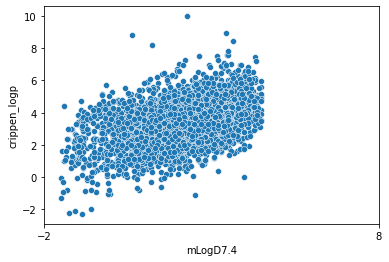

In [77]:
sns.scatterplot(data=df, x="mLogD7.4", y="crippen_logp")
plt.xticks([-2,8])

In [80]:
df.fillna(0, inplace=True)

In [81]:
df.to_csv("feature_count_df.csv")

In [82]:
df

,ID,mLogD7.4,MW,HAC,NumStereocenters,NumUnspecifiedStereocenters,stereo_group_ID,stereo_group_ID__mLogD7.4_SD,Features,SMILES,...,C14,C24,NS,O10,O9,Me1,N14,N1,N11,C26
0,,2.42,423.9,30,1,0,CHEMBL2153435,0.028284271247461926,"C1,C1,C3,C3,C5,C8,C9,C10,C11,C12,C15,C18,C20,C...",CCNC(=O)C[C@H]1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n...,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,,3.58,429.88,30,1,0,CHEMBL207584,0.0,"C1,C3,C3,C4,C5,C10,C11,C12,C14,C15,C18,C19,C20...",COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN1CCC[C@H]1C(...,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,,2.17,477.42,32,1,1,CHEMBL2158819,0.021213203435596288,"C1,C2,C3,C4,C5,C11,C12,C15,C18,C21,C23,C26,CS,...",O=C(O)C(c1ccccc1)N1CCC(CN2CCC(Oc3ccc(Cl)c(Cl)c...,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,,3.14,318.37,24,1,0,CHEMBL188369,0.1626345596729059,"C1,C5,C8,C11,C12,C18,C21,C23,C26,CS,H1,H3,HS,N...",C[C@@H](NC(=O)c1cccnc1Oc1ccccc1)c1ccccc1,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,,2.14,477.42,32,1,0,CHEMBL2158819,0.021213203435596288,"C1,C2,C3,C4,C5,C11,C12,C15,C18,C21,C23,C26,CS,...",O=C(O)[C@@H](c1ccccc1)N1CCC(CN2CCC(Oc3ccc(Cl)c...,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,,1.33,144.17,11,0,0,0,0,"C18,C19,C20,C21,C22,C25,C26,CS,H1,H3,HS,N3,N11,NS",Nc1ccc2ncccc2c1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4186,,-0.49,351.4,26,0,0,0,0,"C3,C3,C5,C18,C21,C22,C26,CS,H1,H3,HS,N4,N7,N8,...",CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc3cccnc32)CC1,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4187,,1.20,404.46,30,1,1,0,0,"C3,C3,C4,C7,C18,C21,C22,C23,C26,CS,H1,H2,H3,HS...",CN(C)CC(O)COc1ccc(Nc2nccc(Nc3ccccc3C#N)n2)cc1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4188,,1.60,376.41,28,0,0,0,0,"C5,C10,C11,C12,C18,C21,C22,C26,CS,H1,H3,HS,N2,...",Nc1cccc(NC(=O)c2ccc(CNC(=O)OCc3cccnc3)cc2)c1,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
